In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


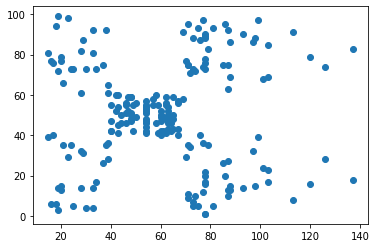

In [3]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

In [4]:
from sklearn.cluster import KMeans

In [5]:
x = df[["Annual Income (k$)","Spending Score (1-100)"]]                                   #df.iloc[:,[3,4]].values

## Elbow Method to find appropriate no.of clusters

In [6]:
wcss = [] # within clusters sum of square wcss

for i in range(1,15):
    km = KMeans(i)
    km.fit(x)
    wcss.append(km.inertia_)

In [7]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37442.24745037571,
 30566.451130251862,
 25050.83230754752,
 21932.39204424098,
 19779.014121222186,
 17556.600879214166,
 16408.957391425385,
 14438.165434565435,
 13176.567913000978]

Text(0, 0.5, 'wcss')

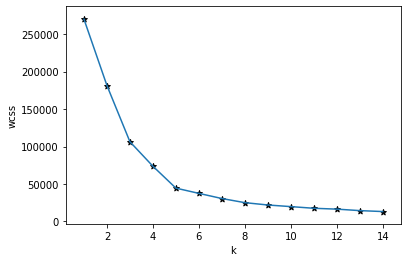

In [8]:
plt.plot(range(1,15),wcss)
plt.scatter(range(1,15),wcss,c = "k",marker="*")
plt.xlabel("k")
plt.ylabel("wcss")

In [9]:
km = KMeans(n_clusters=5,random_state=0)
km.fit_predict(x)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [10]:
x["Cluster"] = km.fit_predict(x)
x.head()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [11]:
km.predict([[17,45]])

array([4])

In [12]:
x.Cluster.unique()

array([4, 3, 1, 2, 0], dtype=int64)

In [13]:
c1 = x[x.Cluster == 0]
c2 = x[x.Cluster == 1]
c3 = x[x.Cluster == 2]
c4 = x[x.Cluster == 3]
c5 = x[x.Cluster == 4]

In [14]:
km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

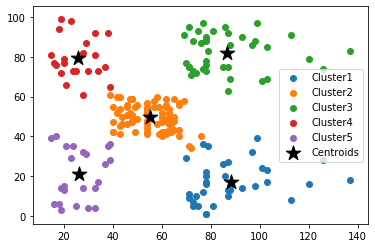

In [21]:
plt.scatter(c1["Annual Income (k$)"],c1["Spending Score (1-100)"],label="Cluster1")
plt.scatter(c2["Annual Income (k$)"],c2["Spending Score (1-100)"],label="Cluster2")
plt.scatter(c3["Annual Income (k$)"],c3["Spending Score (1-100)"],label="Cluster3")
plt.scatter(c4["Annual Income (k$)"],c4["Spending Score (1-100)"],label="Cluster4")
plt.scatter(c5["Annual Income (k$)"],c5["Spending Score (1-100)"],label="Cluster5")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker = "*",s = 234,c="k",label="Centroids")
plt.legend()